# Cluster Evaluation Metrics Visualization

This notebook demonstrates how Davies-Bouldin Index and Calinski-Harabasz Index work with different cluster configurations.

The notebook will:
1. Generate sample clustering data
2. Show how the metrics behave with different cluster separations
3. Demonstrate how the metrics change with different numbers of clusters
4. Provide visualizations to understand the relationships
5. Would you like me to:
6. Add more configurations to test?
7. Include additional metrics?
8. Add more detailed explanations in the markdown cells?
9. Modify the visualizations?


In [1]:
# Import required libraries
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

## Generate and Evaluate Clusters

Define function to create sample data and evaluate clustering metrics

In [2]:
def generate_and_evaluate(n_samples=300, n_clusters=3, std=1.0):
    """
    Generate sample clustering data and evaluate with different metrics
    
    Parameters:
    -----------
    n_samples : int
        Number of samples to generate
    n_clusters : int
        Number of clusters to generate
    std : float
        Standard deviation of the clusters
        
    Returns:
    --------
    X : array
        Generated data points
    labels : array
        Cluster assignments
    dbi : float
        Davies-Bouldin Index score
    chi : float
        Calinski-Harabasz Index score
    """
    # Generate data
    X, y = make_blobs(n_samples=n_samples, 
                      centers=n_clusters, 
                      cluster_std=std, 
                      random_state=42)
    
    # Fit KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    
    # Calculate scores
    dbi = davies_bouldin_score(X, labels)
    chi = calinski_harabasz_score(X, labels)
    
    return X, labels, dbi, chi

In [3]:
# Define configurations to test
configs = [
    {'name': 'Well-separated clusters', 'std': 0.5},
    {'name': 'Overlapping clusters', 'std': 1.5},
]

# Generate data for each configuration
results = []
for config in configs:
    X, labels, dbi, chi = generate_and_evaluate(std=config['std'])
    results.append({
        'name': config['name'],
        'X': X,
        'labels': labels,
        'dbi': dbi,
        'chi': chi
    })

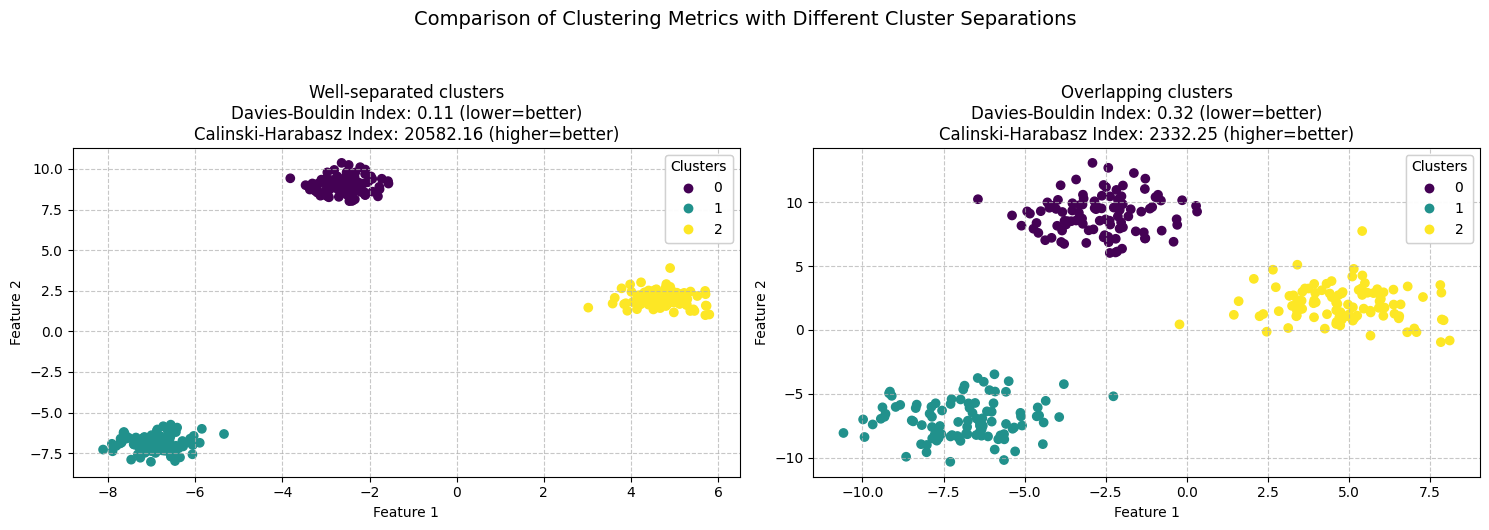

In [4]:
# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Comparison of Clustering Metrics with Different Cluster Separations', 
             fontsize=14, y=1.05)

# Plot each configuration
for idx, result in enumerate(results):
    # Scatter plot of clusters
    scatter = axes[idx].scatter(result['X'][:, 0], 
                              result['X'][:, 1], 
                              c=result['labels'], 
                              cmap='viridis')
    
    # Add title with metrics
    axes[idx].set_title(f"{result['name']}\n"
                       f"Davies-Bouldin Index: {result['dbi']:.2f} (lower=better)\n"
                       f"Calinski-Harabasz Index: {result['chi']:.2f} (higher=better)")
    
    # Add legend
    legend1 = axes[idx].legend(*scatter.legend_elements(),
                              title="Clusters",
                              loc="upper right")
    axes[idx].add_artist(legend1)
    
    # Add grid
    axes[idx].grid(True, linestyle='--', alpha=0.7)
    
    # Set labels
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

In [5]:
# Test different numbers of clusters
k_values = range(2, 11)
k_results = []

for k in k_values:
    X, labels, dbi, chi = generate_and_evaluate(n_clusters=k, std=0.8)
    k_results.append({
        'k': k,
        'dbi': dbi,
        'chi': chi
    })

# Convert to DataFrame for easier plotting
import pandas as pd
k_results_df = pd.DataFrame(k_results)

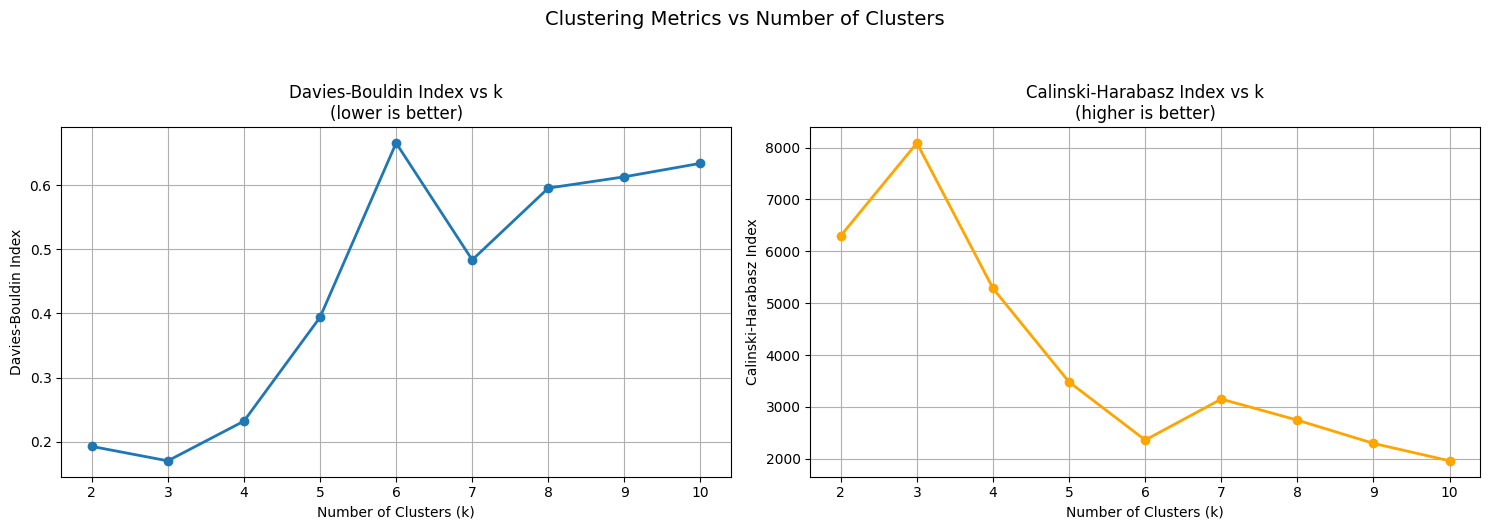

In [6]:
# Plot metrics vs number of clusters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Clustering Metrics vs Number of Clusters', fontsize=14, y=1.05)

# Davies-Bouldin Index
ax1.plot(k_results_df['k'], k_results_df['dbi'], 
         marker='o', linestyle='-', linewidth=2)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Davies-Bouldin Index')
ax1.set_title('Davies-Bouldin Index vs k\n(lower is better)')
ax1.grid(True)

# Calinski-Harabasz Index
ax2.plot(k_results_df['k'], k_results_df['chi'], 
         marker='o', linestyle='-', linewidth=2, color='orange')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Calinski-Harabasz Index')
ax2.set_title('Calinski-Harabasz Index vs k\n(higher is better)')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [7]:
# Create formatted results table
results_table = k_results_df.copy()
results_table['dbi'] = results_table['dbi'].round(3)
results_table['chi'] = results_table['chi'].round(1)
results_table.columns = ['Number of Clusters', 'Davies-Bouldin Index', 'Calinski-Harabasz Index']

print("Metrics for different numbers of clusters:")
display(results_table)

Metrics for different numbers of clusters:


,Number of Clusters,Davies-Bouldin Index,Calinski-Harabasz Index
0,2,0.193,6300.7
1,3,0.170,8087.4
2,4,0.232,5285.6
3,5,0.394,3480.5
4,6,0.666,2362.0
5,7,0.483,3151.6
6,8,0.595,2746.0
7,9,0.613,2297.5
8,10,0.634,1961.5
